# レシピ13.1 直線によるフィッティング
## 問題
特徴量とターゲットベクトルの間の線形な関係を表すモデルを訓練したい。
## 解決策
線形回帰（scikit-learnではLinearRegression）を用いる。

In [0]:
# ライブラリをロード
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [0]:
# データをロードし、特徴量を2つに制限
boston = load_boston()
features = boston.data[:,0:2]
target = boston.target

In [0]:
# 線形回帰器を作成
regression = LinearRegression()

In [0]:
# 線形回帰器を訓練
model = regression.fit(features, target)

## 議論
線形回帰は、特徴量とターゲットベクトルの間におおよそ線形の関係があることを仮定する。つまり、特徴量のターゲットベクトルに与える影響（係数（coefficient）、重み（weight）、パラメータとも呼ばれる）が、一定であると仮定する。ここでは、説明をわかりやすくするため、2つだけ特徴量を持つモデルを訓練している。この場合線形モデルは次のようになる。  

$$
    \hat{y} = \hat{\beta_0} + \hat{\beta_1}x_1+\hat{\beta_2}x_2+\epsilon
$$

ここで$\hat{y}$はターゲット、$x_i$は個々の特徴量、$\hat{\beta_1}$と$\hat{\beta_2}$は、モデルを訓練することで得られる係数だ。$\epsilon$はエラーを表す。モデルを訓練し終わったら、結果のパラメータを見ることができる。例えば、$\hat{\beta_0}$は、バイアス（bias）もしくは切片（intercept）とも呼ばれる値だが、これは`intercept_`で見ることができる。

In [0]:
# 切片(intercept)を表示
model.intercept_

22.485628113468223

$\hat{\beta_1}$と$\hat{\beta_2}$は、`coef_`で見ることができる。

In [0]:
# 特徴量の係数(coefficient)を表示
model.coef_

array([-0.35207832,  0.11610909])

このデータセットのターゲット値は、（1970年代の）ボストンの住宅価格の中央値を1,000ドル単位で表したものだ。データセット中の最初の住宅の価格は、次のように得られる。

In [0]:
# ターゲットベクトルの最初の値に1000をかける
target[0]*1000

24000.0

`predict`メソッドを用いると、その住宅の価格を予測できる。

In [0]:
# 最初の観測値のターゲット値を予測して、1000をかける
model.predict(features)[0]*1000

24573.366631705547

悪くない! 誤差はたったの560.24ドルだ（注: 人によって値は異なります。教科書をそのまま写しています）。  

線形回帰の最大の利点は、理解しやすいことだ。線形書きモデルの係数は、対応する特徴量を1単位ずらした場合の、ターゲット値への影響と解釈できる。例えば、ここで用いた最初の特徴量は、住民あたりの犯罪率だ。この特徴量に対するモデルの係数はおよそ-0.35となる。（ターゲットベクトルが1,000ドル単位なので）この値に1,000を掛けると、住民あたりの犯罪件数の住宅価格への影響を知ることができる。

In [0]:
# 最初の係数に1,000を掛ける
model.coef_[0]*1000

-352.07831564026765

これは、住民あたりの犯罪率が1増えると、住宅価格がおよそ350ドル安くなる、ということを意味する。

## 解説
ここから教科書の内容を解説します。

### データの確認

In [0]:
# どのようなデータか確認してみる
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [0]:
# データの型を確認する
type(boston)

sklearn.utils.Bunch

### データの取り出し方

In [0]:
# データのみを取り出す
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [0]:
# 説明変数名を取り出す
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [0]:
# 目的変数を取り出す
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### データフレームの作成

In [0]:
# Pandasデータフレームに変換
import pandas as pd

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


### データの内容

| 列名 | 説明 |
|:----:|:----:|
| CRIM | 人口1人あたりの犯罪発生率 |
| ZN | 25,000平方フィート以上の居住区画の占める割合 |
| INDUS | 小売業以外の商業が占める面積の割合 |
| CHAS | チャールズ側によるダミー変数（1:川の周辺、0:それ以外）|
| NOX | NOXの濃度 |
| RM | 住居の平均部屋数 |
| AGE | 1940年より前に建てられた物件の割合 |
| DIS | 5つのボストン市の雇用施設からの距離（重み付け済み）|
| RAD | 感情高速道路へのアクセスのしやすさ |
| TAX | 10,000ドルあたりの不動産税率の総計 |
| PTRATIO | 町ごとの児童と教師の比率 |
| B | 町ごとの黒人の比率 |
| LSTAT | 給与の低い職業に従事する人口の割合 |

これがデータの内容です。

### 欠損値の確認

データ解析の前にかならず欠損値の確認をしてください。

In [0]:
# 欠損値があるかどうかを判定する。
pd.isnull(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False


大きなデータフレームは中間が省略されてしまうので、しっかりと確認ができない。

In [0]:
# 欠損値を含む行を抽出する。

filt = df.isnull().any(axis=1)

df[filt]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target


これですべての行に欠損値が含まれていないことが示された。

### 可視化する
可視化するとデータの分布がわかりやすいので、可視化してみましょう。

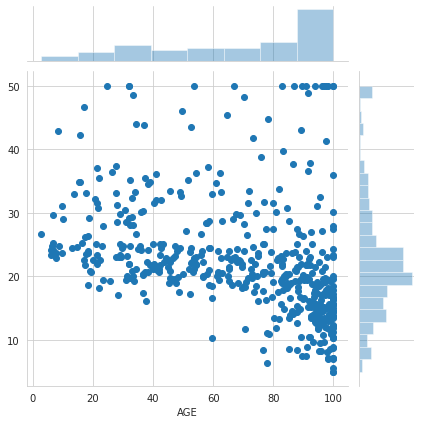

In [0]:
# seabornのインポート
import seaborn as sns

# 可視化
sns.jointplot(df['AGE'], boston.target)

横軸の犯罪率が0付近のものが多い（不均衡データ）なので、あんまり線形回帰の例には適していない。

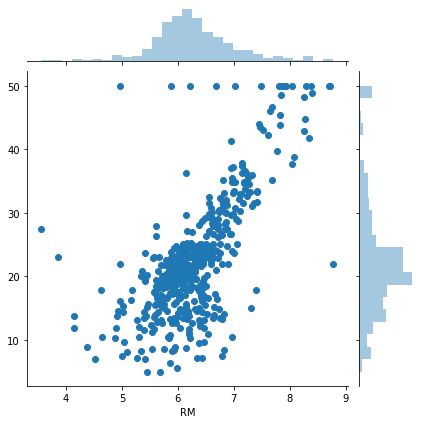

In [0]:
# 他のデータでもう一度試してみる
sns.jointplot(df['RM'], boston.target)

線形回帰には非常に適した例ですね。RMは部屋数です。  

部屋数が増えれば、住宅価格も増えるという予想通りの結果です。

### 線形回帰モデルの可視化
seabornには線形モデルが内蔵されているので、簡単にモデルの可視化ができます。  

しかしscikit-learnのコードを利用して求めた値を入力するにはMatplotlibが必要です。

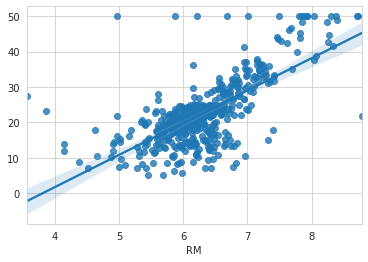

In [0]:
# 見やすいようにスタイルの変更
sns.set_style("whitegrid")

# 回帰モデルの可視化
sns.regplot(df['RM'], boston.target)

#### 信頼区間を追加

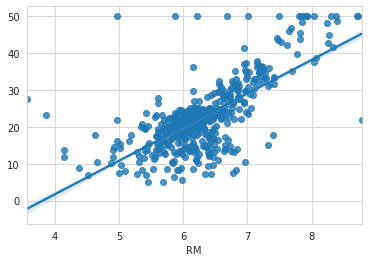

In [0]:
# 信頼区間を追加して可視化する。
# ciのデフォルトは95
sns.regplot(df['RM'], boston.target, ci=50)

### Matplotlibで可視化
こまかい調整ができるのはMatplotlibなのでこちらも使ってみる。


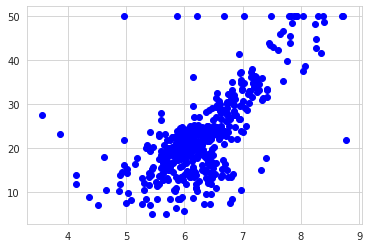

In [0]:
# seabornと同じようにプロット
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df['RM'], boston.target, color = 'blue')

In [0]:
# 目的変数もdfに加える
df['target'] = boston.target
 
# RMで回帰モデルを作る
my_model = LinearRegression()
X = df['RM'].values
Y = df['target'].values
# 学習させる
my_model.fit(X, Y)

ValueError: ignored

In [0]:
boston.target.flatten(order='C').shape

In [0]:
boston.target.shape

In [0]:
ndarray(df['RM']).shape